# Breast Cancer Diagnosis

### Abstract: 
This notebook attempts to predict cancer by applying some basic Machine Learning algorithms on the Breast Cancer (Wisconsin) Diagnosis dataset. Existing algorithms in the python programming language scikit-learn package are used to classify cases as Benign (B) or Malignant (M).

### Introduction:
The Breast Cancer (Wisconsin) Diagnosis dataset contains the diagnosis and a set of 30 features describing the characteristics of the cell nuclei present in the digitized image of a fine needle aspirate (FNA) of a breast mass.

Fine-needle aspiration (FNA) is a diagnostic procedure used to investigate lumps or masses. In this technique, a thin (23–25 gauge), hollow needle is inserted into the mass for sampling of cells that, after being stained, are examined under a microscope (biopsy). Fine-needle aspiration biopsies are very safe minor surgical procedures.

Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter);
* texture (standard deviation of gray-scale values);
* perimeter;
* area;
* smoothness (local variation in radius lengths);
* compactness (perimeter^2 / area - 1.0);
* concavity (severity of concave portions of the contour);
* concave points (number of concave portions of the contour);
* symmetry;
* fractal dimension (“coastline approximation” - 1).

The mean, standard error (SE) and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. We will analyze the features to understand the predictive value for diagnosis. We will then create models using two different algorithms and use the models to predict the diagnosis. Then two visual aids to describe the diagnosis will be displayed.

In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [34]:
data = pd.read_csv("data.csv")
filtered_data = data.dropna(axis='columns', how='all').copy()
filtered_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
data.shape

(569, 33)

In [36]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [37]:
cat_cols = filtered_data['diagnosis']
filtered_data['diagnosis'] = pd.Categorical(filtered_data['diagnosis'])
print('Categories:\n', filtered_data['diagnosis'].value_counts())

Categories:
 B    357
M    212
Name: diagnosis, dtype: int64


In [38]:
filtered_data['diagnosis'] = filtered_data.diagnosis.cat.codes

In [39]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline  

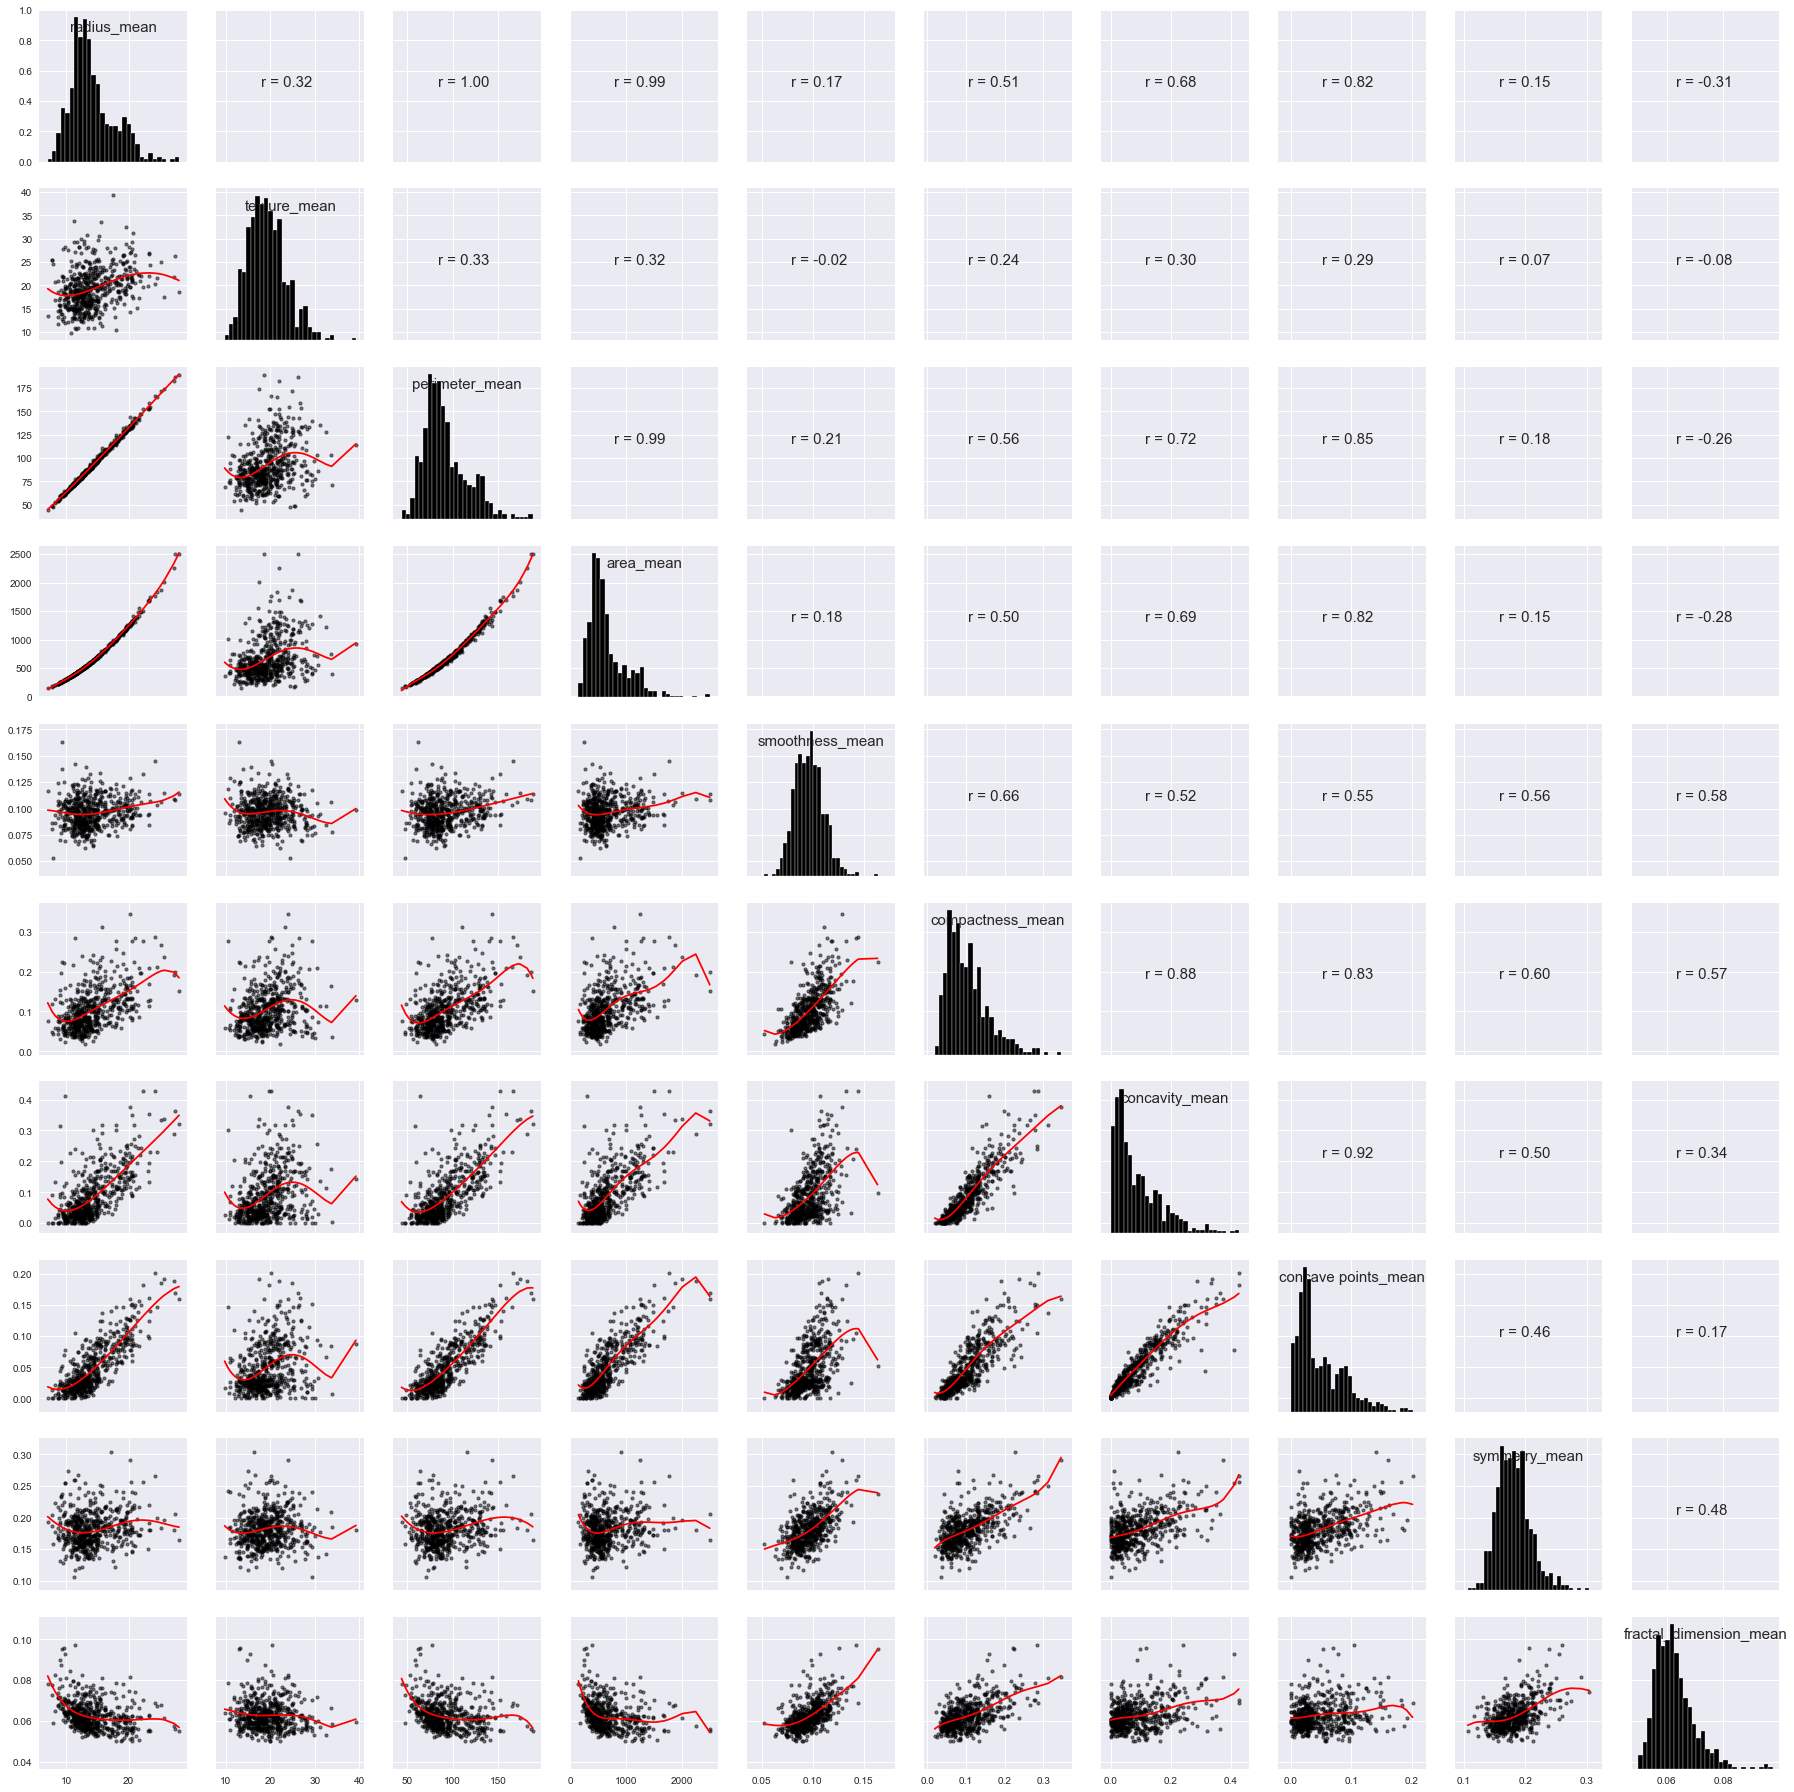

In [40]:
def corrplot(df):
    def scatterfunc(x, y, **kws):
        plt.scatter(x, y, linewidths=1, facecolor="k", s=10, alpha = 0.5)
        spline = np.polyfit(x, y, 5)
        model = np.poly1d(spline)
        x = np.sort(x)
        plt.plot(x,model(x),'r-')
        
    def histfunc(x, **kws):
        plt.hist(x,bins=30,color = "black", ec="white")

    def corrfunc(x, y, **kws):
        r, _ = stats.pearsonr(x, y)
        ax = plt.gca()
        ax.annotate("r = {:.2f}".format(r),
                    xy=(.3, .5), xycoords=ax.transAxes, fontsize=15)
    
    def make_diag_titles(g,titles):
        for ax in g.axes.flatten():
            ax.set_ylabel('')
            ax.set_xlabel('')
        for ax, col in zip(np.diag(g.axes), df.columns):
            ax.set_title(col, y=0.82, fontsize=15)
        return g

    g = sns.PairGrid(df, diag_sharey=False)
    g.map_lower(scatterfunc) 
    g.map_upper(corrfunc) 
    g.map_diag(histfunc)
    g = make_diag_titles(g, df.columns)
    plt.tight_layout()

corrplot(filtered_data.loc[:,'radius_mean':'fractal_dimension_mean'])
#corrplot(filtered_data.loc[:,'radius_se':'fractal_dimension_se'])
#corrplot(filtered_data.loc[:,'radius_worst':'fractal_dimension_worst'])

In [41]:
#sns.pairplot(filtered_data.loc[:,'diagnosis':'fractal_dimension_mean'], hue="diagnosis")

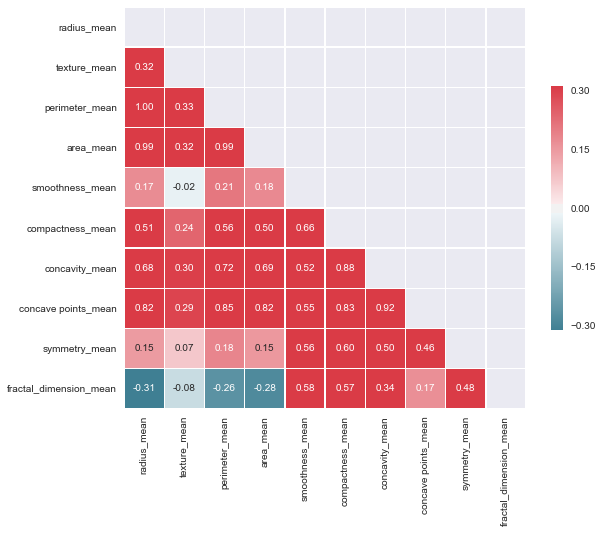

In [42]:
def corrdiag(df):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    #f, ax = plt.subplots()
    plt.figure(figsize = (9,9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=0.3, center=0,
                fmt=".2f", square=True, linewidths=0.5, cbar_kws={'shrink':.5})
    plt.show()

corrdiag(filtered_data.loc[:,'radius_mean':'fractal_dimension_mean'])
#corrdiag(filtered_data.loc[:,'radius_se':'fractal_dimension_se'])
#corrdiag(filtered_data.loc[:,'radius_worst':'fractal_dimension_worst'])

In [43]:
#def heatmap(df):
#    corr = df.corr()
#    plt.figure(figsize = (11,9))
#    sns.heatmap(corr, cmap='coolwarm', 
#        xticklabels=corr.columns,
#        yticklabels=corr.columns)
#    plt.show()

#heatmap(filtered_data.loc[:,'radius_mean':'fractal_dimension_worst'])

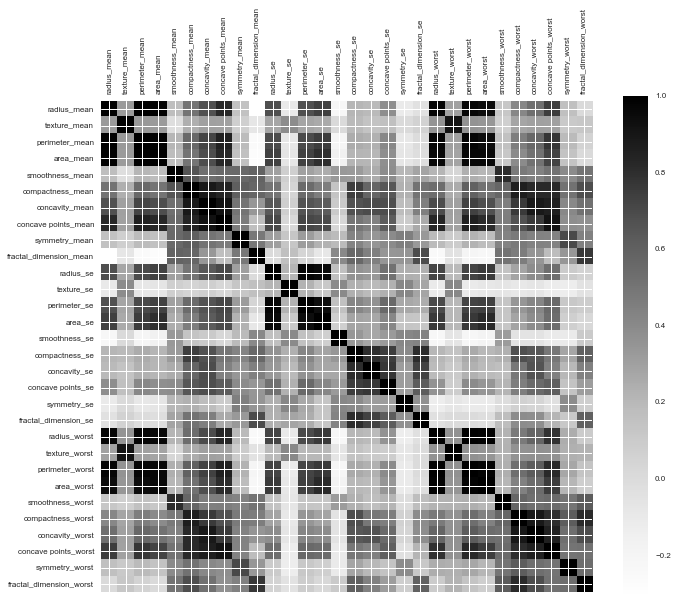

In [44]:
def plotCorrMatrix(df):
    f = plt.figure(figsize=(11,9))
    plt.matshow(df.corr(), fignum=f.number)
    plt.xticks(range(df.shape[1]), df.columns, fontsize=8, rotation=90)
    plt.yticks(range(df.shape[1]), df.columns, fontsize=8)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=8)

plotCorrMatrix(filtered_data.loc[:,'radius_mean':'fractal_dimension_worst'])

In [45]:
#def structured_heatmap(df):
#    df_pal = sns.husl_palette(df.shape[1], s=.45)
#    df_lut = dict(zip(df.columns, df_pal))
#    df_colors = pd.Series(df.columns, index=df.columns).map(df_lut)
#    sns.clustermap(df.corr(), center=0, cmap="vlag",
#                   row_colors=df_colors, col_colors=df_colors,
#                   linewidths=.75, figsize=(9, 9))
#    plt.show()

#structured_heatmap(filtered_data)

In [46]:
def highestcorrpairs(df):
    corr = df.corr().abs()
    sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack().sort_values(ascending=False))
    return sol[sol>0.95]

print(highestcorrpairs(filtered_data.loc[:,'radius_mean':'fractal_dimension_worst']))

radius_mean      perimeter_mean     0.997855
radius_worst     perimeter_worst    0.993708
radius_mean      area_mean          0.987357
perimeter_mean   area_mean          0.986507
radius_worst     area_worst         0.984015
perimeter_worst  area_worst         0.977578
radius_se        perimeter_se       0.972794
perimeter_mean   perimeter_worst    0.970387
radius_mean      radius_worst       0.969539
perimeter_mean   radius_worst       0.969476
radius_mean      perimeter_worst    0.965137
area_mean        radius_worst       0.962746
                 area_worst         0.959213
                 perimeter_worst    0.959120
radius_se        area_se            0.951830
dtype: float64


In [47]:
from sklearn.preprocessing import scale
y = filtered_data['diagnosis']
filtered_data.drop(filtered_data.columns[[0,1]], axis=1, inplace=True)
X = scale(filtered_data)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(y_train.value_counts())
print('-'*20)
print(y_test.value_counts())

0    249
1    149
Name: diagnosis, dtype: int64
--------------------
0    108
1     63
Name: diagnosis, dtype: int64


In [49]:
#taken from here:https://github.com/MartinThoma/algorithms/blob/master/ML/mnist/many-classifiers/python.py

import numpy as np
import pandas as pd
import time

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


def main():
    """Run experiment with multiple classifiers."""
    data = get_data()

    print("Got %i training samples and %i test samples." %
          (len(data['train']['X']), len(data['test']['X'])))

    # Get classifiers
    classifiers = [
        ('Logistic Regression (C=1)', LogisticRegression(C=1)),
        ('Logistic Regression (C=1000)', LogisticRegression(C=10000)),
        ('RBM 200, n_iter=40, LR=0.01, Reg: C=1',
         Pipeline(steps=[('rbm', BernoulliRBM(n_components=200,
                                              n_iter=40,
                                              learning_rate=0.01,
                                              verbose=True)),
                         ('logistic', LogisticRegression(C=1))])),
        ('RBM 200, n_iter=40, LR=0.01, Reg: C=10000',
         Pipeline(steps=[('rbm', BernoulliRBM(n_components=200,
                                              n_iter=40,
                                              learning_rate=0.01,
                                              verbose=True)),
                         ('logistic', LogisticRegression(C=10000))])),
        ('RBM 100', Pipeline(steps=[('rbm', BernoulliRBM(n_components=100)),
                                    ('logistic', LogisticRegression(C=1))])),
        ('RBM 100, n_iter=20',
         Pipeline(steps=[('rbm', BernoulliRBM(n_components=100, n_iter=20)),
                         ('logistic', LogisticRegression(C=1))])),
        ('RBM 256', Pipeline(steps=[('rbm', BernoulliRBM(n_components=256)),
                                    ('logistic', LogisticRegression(C=1))])),
        ('RBM 512, n_iter=100',
         Pipeline(steps=[('rbm', BernoulliRBM(n_components=512, n_iter=10)),
                         ('logistic', LogisticRegression(C=1))])),
        ('SVM, adj.', SVC(probability=False,
                          kernel="rbf",
                          C=2.8,
                          gamma=.0073,
                          cache_size=200)),
        ('SVM, linear', SVC(kernel="linear", C=0.025, cache_size=200)),
        ('k nn', KNeighborsClassifier(3)),
        ('Decision Tree', DecisionTreeClassifier(max_depth=5)),
        ('Random Forest', RandomForestClassifier(n_estimators=50, n_jobs=10)),
        ('Random Forest 2', RandomForestClassifier(max_depth=5,
                                                   n_estimators=10,
                                                   max_features=1,
                                                   n_jobs=10)),
        ('AdaBoost', AdaBoostClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('LDA', LinearDiscriminantAnalysis()),
        ('QDA', QuadraticDiscriminantAnalysis())
    ]

    # Fit them all
    classifier_data, confmat_data = {}, {}
    for clf_name, clf in classifiers:
        print("#" * 80)
        print("Start fitting '%s' classifier." % clf_name)
        examples = 100000  # Reduce data to make training faster
        t0 = time.time()
        clf.fit(data['train']['X'][:examples], data['train']['y'][:examples])
        t1 = time.time()
        an_data, cm = analyze(clf, data, t1 - t0, clf_name=clf_name)
        classifier_data[clf_name] = {'training_time': t1 - t0,
                                     'testing_time': an_data['testing_time'],
                                     'accuracy': an_data['accuracy']}
        confmat_data[clf_name] = {'matrix': cm,
                                  'accuracy': an_data['accuracy']}
    #print_website(classifier_data)
    df_ = pd.DataFrame.from_dict(classifier_data, orient='index')
    return df_, confmat_data


def analyze(clf, data, fit_time, clf_name=''):
    """
    Analyze how well a classifier performs on data.

    Parameters
    ----------
    clf : classifier object
    data : dict
    fit_time : float
    clf_name : str

    Returns
    -------
    dict
        accuracy and testing_time
    """
    results = {}

    # Get confusion matrix
    from sklearn import metrics
    t0 = time.time()
    predicted = np.array([])
    for i in range(0, len(data['test']['X']), 128):  # go in chunks of size 128
        predicted_single = clf.predict(data['test']['X'][i:(i + 128)])
        predicted = np.append(predicted, predicted_single)
    t1 = time.time()
    results['testing_time'] = t1 - t0
    #print("Classifier: %s" % clf_name)
    #print("Training time: %0.4fs" % fit_time)
    #print("Testing time: %0.4fs" % results['testing_time'])
    cm = metrics.confusion_matrix(data['test']['y'], predicted)
    #print("Confusion matrix:\n%s" % cm)
    results['accuracy'] = metrics.accuracy_score(data['test']['y'], predicted)
    #print("Accuracy: %0.4f" % results['accuracy'])

    return results, cm


def get_data(dataset='wbcd'):
    if dataset == 'wbcd':
        import sklearn
        from sklearn.datasets import fetch_mldata
        from sklearn.utils import shuffle

        x = pd.read_csv("data.csv")
        x = x.dropna(axis='columns', how='all')
        y = x['diagnosis']
        x.drop(x.columns[[0,1]], axis=1, inplace=True)

        le = sklearn.preprocessing.LabelEncoder()
        le.fit(y)
        y = le.transform(y)

        x, y = shuffle(x, y, random_state=0)

        from sklearn.model_selection import train_test_split
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
        data = {'train': {'X': x_train,
                          'y': y_train},
                'test': {'X': x_test,
                         'y': y_test},
                'n_classes': len(np.unique(y_train))}
        scaler = sklearn.preprocessing.StandardScaler().fit(data['train']['X'])
        data['train']['X'] = scaler.transform(data['train']['X'])
        data['test']['X'] = scaler.transform(data['test']['X'])
    else:
        raise NotImplemented()
    return data


if __name__ == '__main__':
    table, cm = main()


Got 381 training samples and 188 test samples.
################################################################################
Start fitting 'Logistic Regression (C=1)' classifier.
################################################################################
Start fitting 'Logistic Regression (C=1000)' classifier.
################################################################################
Start fitting 'RBM 200, n_iter=40, LR=0.01, Reg: C=1' classifier.
[BernoulliRBM] Iteration 1, pseudo-likelihood = -34.98, time = 0.16s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -54.49, time = 0.04s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -78.24, time = 0.02s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -104.78, time = 0.02s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -107.68, time = 0.02s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -127.95, time = 0.02s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -88.55, time = 0.02s
[BernoulliRBM] Iteration 8, pseudo-likelihood =

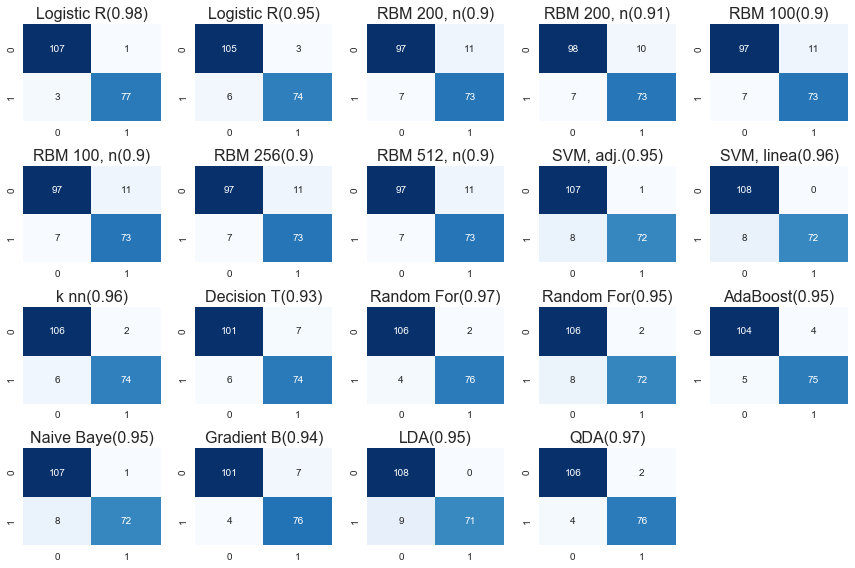

In [50]:
f, ax = plt.subplots(4,5, figsize=(12,8))
ax = ax.ravel()
for a, key in zip(ax, cm.keys()):
    sns.heatmap(cm[key]['matrix'], annot=True, ax=a, 
                cbar=False, cmap='Blues', fmt='d') #annot=True to annotate cells
    # labels, title and ticks
    #a.set_xlabel('Predicted labels')
    #a.set_ylabel('True labels')
    title = (key[:10] + '('+str(round(cm[key]['accuracy'],2))+')') if len(key) > 10 \
                                      else key+'('+str(round(cm[key]['accuracy'],2))+')'
    a.set_title(title, fontsize=16)
    #a.xaxis.set_ticklabels(['Benign', 'Malignant'])
    #a.yaxis.set_ticklabels(['Malignant', 'Benign'])
ax[-1].set_visible(False)
plt.tight_layout()
plt.show()

### Table to compare the classifiers

In [51]:
table.head(20)

,training_time,testing_time,accuracy
AdaBoost,0.129188,0.010596,0.952128
Decision Tree,0.012225,0.000414,0.930851
Gradient Boosting,0.173883,0.029847,0.941489
LDA,0.269010,0.000530,0.952128
Logistic Regression (C=1),0.068056,0.000286,0.978723
Logistic Regression (C=1000),0.006368,0.000253,0.952128
Naive Bayes,0.001295,0.000475,0.952128
QDA,0.002641,0.000808,0.968085
RBM 100,0.116397,0.000807,0.904255
"RBM 100, n_iter=20",0.202342,0.001147,0.904255


### Some patient data

In [52]:
patient = pd.read_csv("data.csv")
patient = patient.dropna(axis='columns', how='all')
patient.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Malignant patient instance

In [53]:
M = patient.iloc[18,:]
M[:2]

id           849014
diagnosis         M
Name: 18, dtype: object

Benign patient instance

In [54]:
B = patient.iloc[19,:]
B[:2]

id           8510426
diagnosis          B
Name: 19, dtype: object

Deleting diagnosis for testing

In [55]:
M.drop(labels=['diagnosis'])
B.drop(labels=['diagnosis']);

Cancer prediction using the best classifier - LogisticRegression

In [56]:
def predictCancer(clf,train_data,val_data,test_data):
    model = clf()
    pred = model.fit(train_data,val_data).predict(test_data)
    return pred

In [57]:
p = predictCancer(LogisticRegression,filtered_data,y,M[2:].values.reshape(1,-1))
print('Patient ID:',M[0],'Result:',p)

Patient ID: 849014 Result: [1]


## Visualise Patient Data (Probability Density Function)
This plot can help doctors who diagnose cancer for patients. From the patient’s point of view, the diagnostic results in probability density graph with patients diagnosis strong line included, can help check their status at once.

If patient’s factor of cancer is above malignants’ factor average, it is marked with a red line. (Except ’_worst’ variance)

In [58]:
#taken from:https://www.kaggle.com/buddhiniw/breast-cancer-prediction
features=list(filtered_data.columns)
#print(features)
df = filtered_data
df['diagnosis'] = y
# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

def plotProbDensity(patient_data, title):
    fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(14,10))
    axes = axes.ravel()
    for idx,ax in enumerate(axes):
        ax.figure
        binwidth = (max(df[features[idx]]) - min(df[features[idx]]))/50
        ax.hist([dfM[features[idx]],dfB[features[idx]]], 
                bins=np.arange(min(df[features[idx]]), 
                           max(df[features[idx]]) + binwidth, binwidth) , 
            alpha=0.5,stacked=True, label=['M','B'], color=['r','g'])
        if patient_data[idx]>dfM[features[idx]].mean():
            ax.axvline(x=patient_data[idx],c='firebrick',linewidth=5,zorder=50)
        else:
            ax.axvline(x=patient_data[idx],c='black',linewidth=5,zorder=50)
        #ax.legend(loc='upper right')
        ax.set_title(features[idx])

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')
    plt.suptitle(title, y=1.03, horizontalalignment='center', 
                 verticalalignment='top', fontsize = 16)
    plt.tight_layout()
    plt.show()

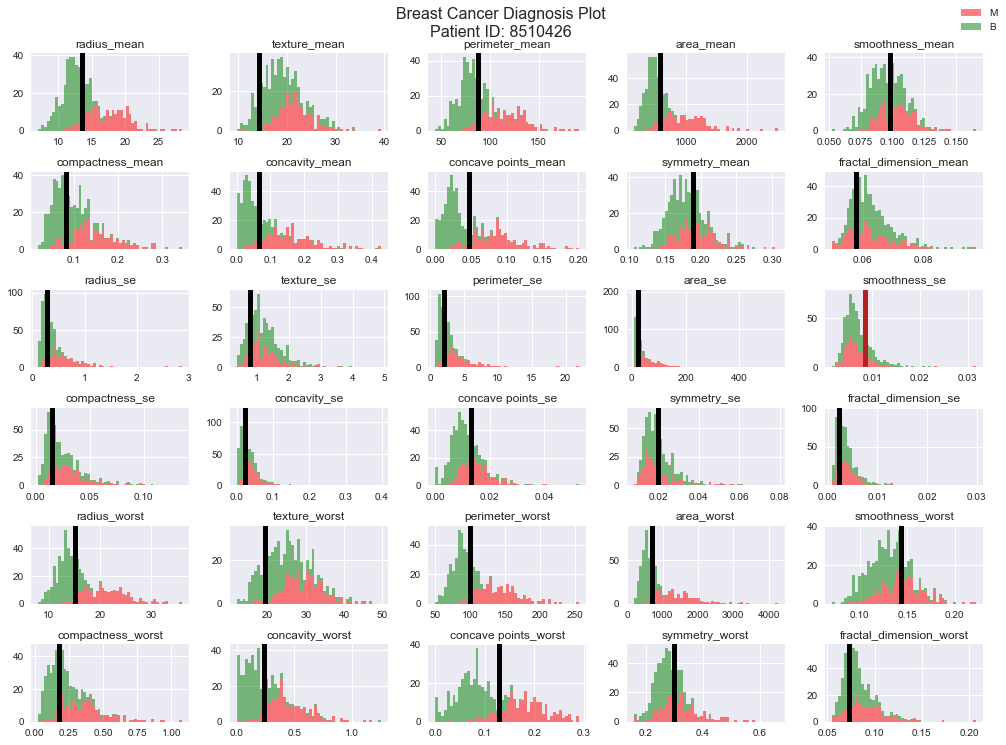

In [59]:
title = 'Breast Cancer Diagnosis Plot\nPatient ID: {}'.format(B[0])
plotProbDensity(B[2:], title)

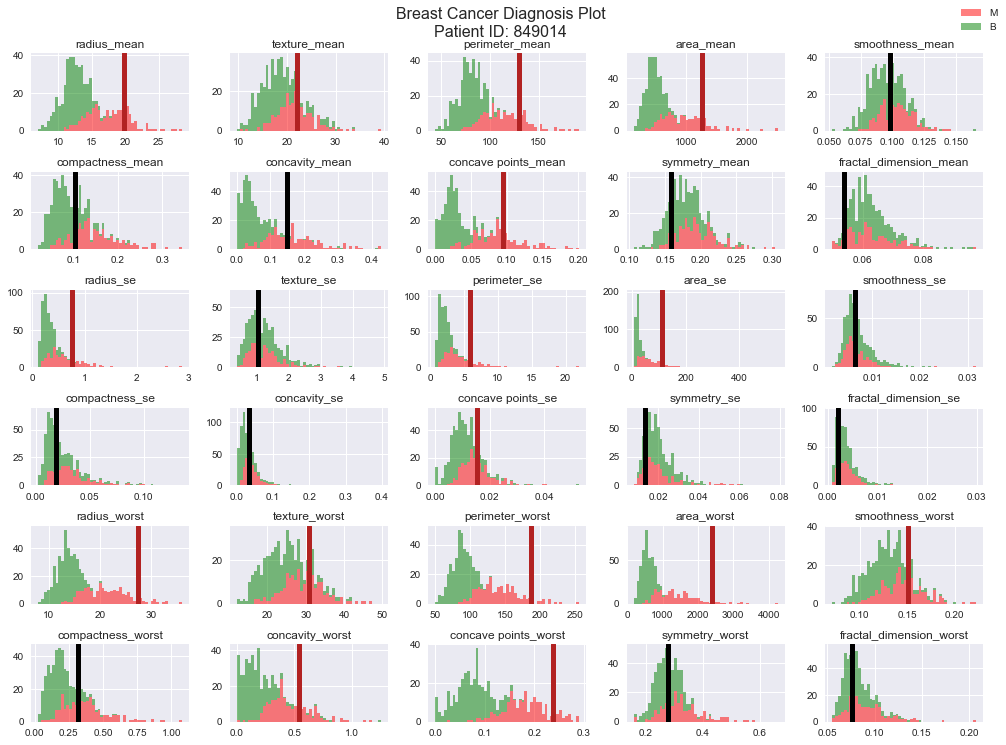

In [60]:
title = 'Breast Cancer Diagnosis Plot\nPatient ID: {}'.format(M[0])
plotProbDensity(M[2:], title)

## Radar plot for visualization

In [61]:
from math import pi

def get_data(id_loc, dataset='wbcd'):

    if dataset == 'wbcd':
        df = pd.read_csv("data.csv")
        df = df.dropna(axis='columns', how='all')
        #y = df['diagnosis']
        #le = sklearn.preprocessing.LabelEncoder()
        #le.fit(y)
        #y = le.transform(y)

        B = df.iloc[id_loc,:]

        # split dataframe into two based on diagnosis
        dfM=df[df['diagnosis'] =='M']
        dfB=df[df['diagnosis'] =='B']
        df = df.drop(labels='diagnosis',axis=1)
        df_mean = df.loc[:,df.columns.str.endswith('mean')]
        #features = [s[:-5] for s in list(df_mean.columns)] 
        #groups = ['mean', 'se', 'worst']
        dfB = dfB.drop(labels='diagnosis', axis=1)

        dfBm = dfB.loc[:,dfB.columns.str.endswith('mean')]
        dfBm_norm = (dfBm-dfBm.min())/(dfBm.max()-dfBm.min())
        #benigndata_mean = dfBm_norm.mean().values
        Bmean = B.iloc[2:12]
        Bmean_norm = (Bmean-dfBm.min())/(dfBm.max()-dfBm.min())
        #patientdata_mean = Bmean_norm.values

        dfBs = dfB.loc[:,dfB.columns.str.endswith('se')]
        dfBs_norm = (dfBs-dfBs.min())/(dfBs.max()-dfBs.min())
        #benigndata_se = dfBs_norm.mean().values
        Bse = B.iloc[12:22]
        Bse_norm = (Bse-dfBs.min())/(dfBs.max()-dfBs.min())
        #patientdata_se = Bse_norm.values

        dfBw = dfB.loc[:,dfB.columns.str.endswith('worst')]
        dfBw_norm = (dfBw-dfBw.min())/(dfBw.max()-dfBw.min())
        #benigndata_worst = dfBw_norm.mean().values
        Bworst = B.iloc[22:32]
        Bworst_norm = (Bworst-dfBw.min())/(dfBw.max()-dfBw.min())
        #patientdata_worst = Bworst_norm.values

        data = {'features': [s[:-5] for s in list(df_mean.columns)],
                'id': df.iloc[id_loc,:][0].astype(int),
                'gpnames':['mean', 'se', 'worst'],
                'groups': [{'benigndata': dfBm_norm.mean().values,
                            'patientdata': Bmean_norm.values},
                            {'benigndata': dfBs_norm.mean().values,
                            'patientdata': Bse_norm.values,},
                            { 'benigndata': dfBw_norm.mean().values,
                            'patientdata': Bworst_norm.values}]         
        }
    else:
        raise NotImplemented()
    return data


def createRadar(data, title):
    # number of variables
    N = len(data['features'])
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles=np.concatenate((angles,[angles[0]]))
 
    # Initialise the spider plot
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(11,11), 
                                subplot_kw=dict(polar=True))
    axes = axes.ravel()
    for idx,ax in enumerate(axes):
        ax.figure
        stats = data['groups'][idx]['benigndata']
        stats = np.concatenate((stats,[stats[0]]))
        ax.plot(angles, stats, '-', linewidth=2)
        ax.fill(angles, stats, alpha=0.25)
        pdat = data['groups'][idx]['patientdata']
        pdat = np.concatenate((pdat,[pdat[0]]))
        ax.plot(angles, pdat, 'o-', linewidth=2)
        ax.set_thetagrids(angles * 180/np.pi, data['features'])
        ax.set_yticklabels([])
        ax.set_title(data['gpnames'][idx], y=1.08, fontsize=16)
        ax.grid(True)
    fig.suptitle(title, horizontalalignment='center',fontsize=16)
    fig.tight_layout()
    plt.show()

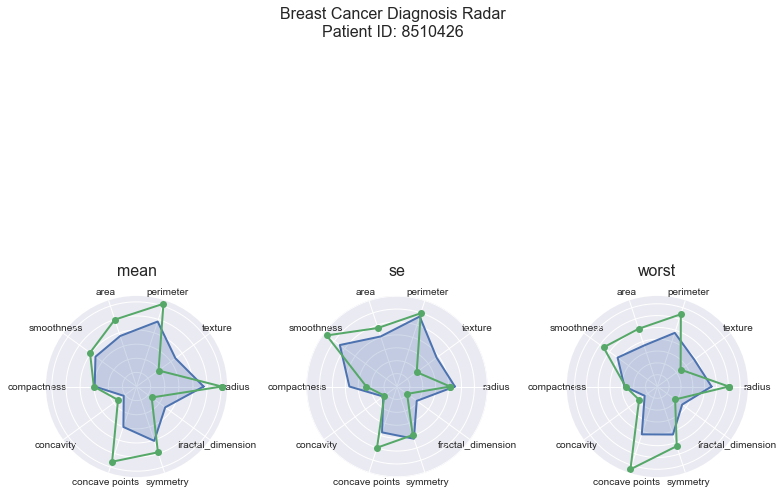

In [62]:
d = get_data(19)
title = 'Breast Cancer Diagnosis Radar\nPatient ID: {}'.format(d['id'])
createRadar(d, title)

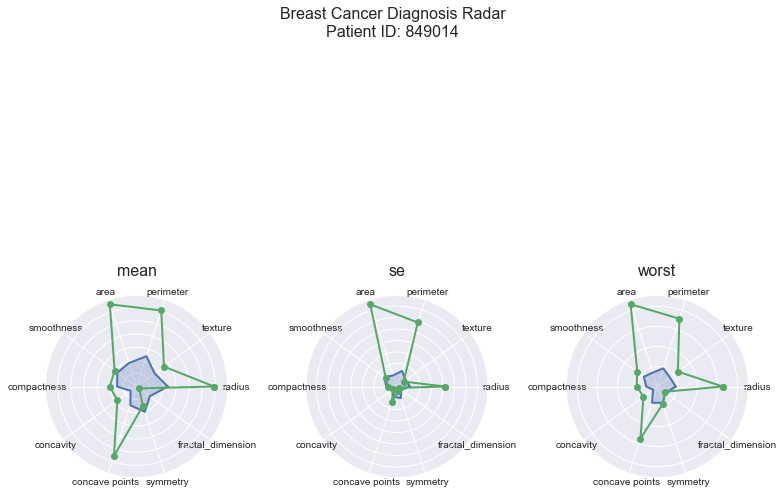

In [63]:
d = get_data(18)
title = 'Breast Cancer Diagnosis Radar\nPatient ID: {}'.format(d['id'])
createRadar(d, title)